# Project Members:
Nuzhat Prova - U01759794
Sunita Inderjit - U01911321
Sai Ramya Kasumurthy - U01933225
Srikanth Reddy Yeruva - U01888231

# Midterm Project - Analyzing New York City Data with SQL, Python, and Version Control

The primary objective of the project is to analyze and derive insights from three NYPD datasets related to public safety in New York City. Utilizing data science methodologies and tools such as Python for data cleaning and analysis, SQL for data retrieval, and Git for version control, the project aims to uncover patterns and trends in hate crimes, shootings, and arrests. The end goal is to provide actionable insights that can aid in data-driven decision-making for law enforcement agencies and policymakers.

Let's start with the NYPD Hate Crime dataset, our plan is to clean and transform the data for analytical readiness, focusing on handling missing values and ensuring appropriate data types. Subsequently, exploratory data analysis will be conducted to uncover key trends and patterns, such as the distribution of hate crimes over time, common bias motives and prevalent offense categories.

##### NYPD Hate Crime Dataset:

In [113]:
import pandas as pd

# Load the NYPD Hate Crime dataset
file_path = 'NYPD_Hate_Crimes.csv'
df_hate_crimes = pd.read_csv(file_path)

# Show the first few records and summary statistics
df_hate_crimes.head(), df_hate_crimes.describe()

(   Full Complaint ID  Complaint Year Number  Month Number Record Create Date  \
 0    201904612204817                   2019             2         02/08/2019   
 1    201904812229517                   2019             3         03/09/2019   
 2    201904812231317                   2019             3         03/10/2019   
 3    201904812226617                   2019             3         03/08/2019   
 4    201904212405517                   2019             5         05/11/2019   
 
    Complaint Precinct Code Patrol Borough Name County  \
 0                       46   PATROL BORO BRONX  BRONX   
 1                       48   PATROL BORO BRONX  BRONX   
 2                       48   PATROL BORO BRONX  BRONX   
 3                       48   PATROL BORO BRONX  BRONX   
 4                       42   PATROL BORO BRONX  BRONX   
 
   Law Code Category Description           Offense Description  \
 0                        FELONY                FELONY ASSAULT   
 1                   MISDEMEAN

The dataset above has several columns, including 'Full Complaint ID', 'Complaint Year Number', 'Month Number', and others. The numerical summary indicates that we have data for the years ranging from 2019 to 2023, and the complaint precinct code.

In [114]:
# Check for missing values in each column
missing_values = df_hate_crimes.isnull().sum()
missing_values

Full Complaint ID                   0
Complaint Year Number               0
Month Number                        0
Record Create Date                  0
Complaint Precinct Code             0
Patrol Borough Name                 0
County                              0
Law Code Category Description       0
Offense Description                 0
PD Code Description                 0
Bias Motive Description             0
Offense Category                    0
Arrest Date                      1344
Arrest Id                        1344
dtype: int64

In [115]:
# Impute missing values in 'Arrest Date' and 'Arrest Id' with 'Not Available'
df_hate_crimes['Arrest Date'].fillna('Not Available', inplace=True)
df_hate_crimes['Arrest Id'].fillna('Not Available', inplace=True)

# Convert 'Record Create Date' and 'Arrest Date' to datetime format (where applicable)
df_hate_crimes['Record Create Date'] = pd.to_datetime(df_hate_crimes['Record Create Date'], errors='coerce')
df_hate_crimes['Arrest Date'] = pd.to_datetime(df_hate_crimes['Arrest Date'], errors='coerce')

# Check the data types of all columns to confirm changes
df_hate_crimes.dtypes

Full Complaint ID                         int64
Complaint Year Number                     int64
Month Number                              int64
Record Create Date               datetime64[ns]
Complaint Precinct Code                   int64
Patrol Borough Name                      object
County                                   object
Law Code Category Description            object
Offense Description                      object
PD Code Description                      object
Bias Motive Description                  object
Offense Category                         object
Arrest Date                      datetime64[ns]
Arrest Id                                object
dtype: object

From the above, we can see that the Record Create Date and Arrest Date columns have been successfully converted to datetime format. The missing values in Arrest Date and Arrest Id have been imputed.

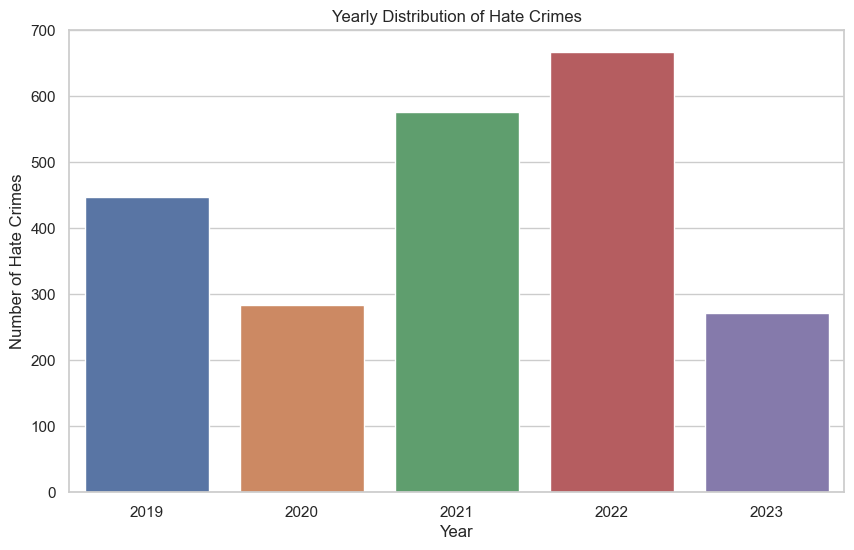

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plot the yearly distribution of hate crimes
plt.figure(figsize=(10, 6))
sns.countplot(x='Complaint Year Number', data=df_hate_crimes)
plt.title('Yearly Distribution of Hate Crimes')
plt.xlabel('Year')
plt.ylabel('Number of Hate Crimes')
plt.show()

The plot above shows the yearly distribution of hate crimes. This help us understand trends over time, for instance, in 2022 Number of Hate Crimes increased significantly.

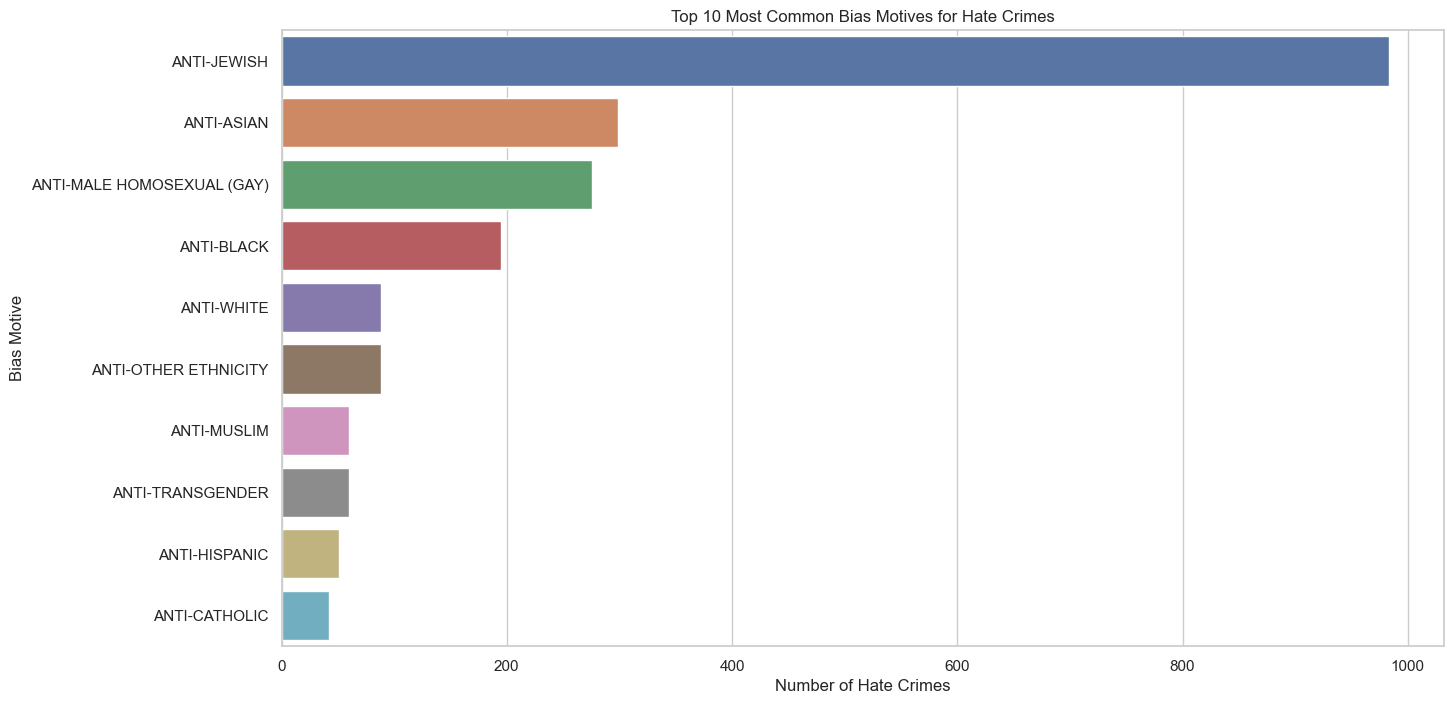

In [117]:
# Plot the top 10 most common bias motives
plt.figure(figsize=(15, 8))
sns.countplot(y='Bias Motive Description', data=df_hate_crimes, order = df_hate_crimes['Bias Motive Description'].value_counts().index[:10])
plt.title('Top 10 Most Common Bias Motives for Hate Crimes')
plt.xlabel('Number of Hate Crimes')
plt.ylabel('Bias Motive')
plt.show()

The plot above shows the top 10 most common bias motives behind hate crimes. This type of analysis can help identify the most prevalent forms of prejudice and hatred, which is valuable for focused interventions.The plot shows the most common offense categories associated with hate crimes. This information is useful for understanding the types of incidents that are most frequently reported, which can guide both preventative measures and response strategies.

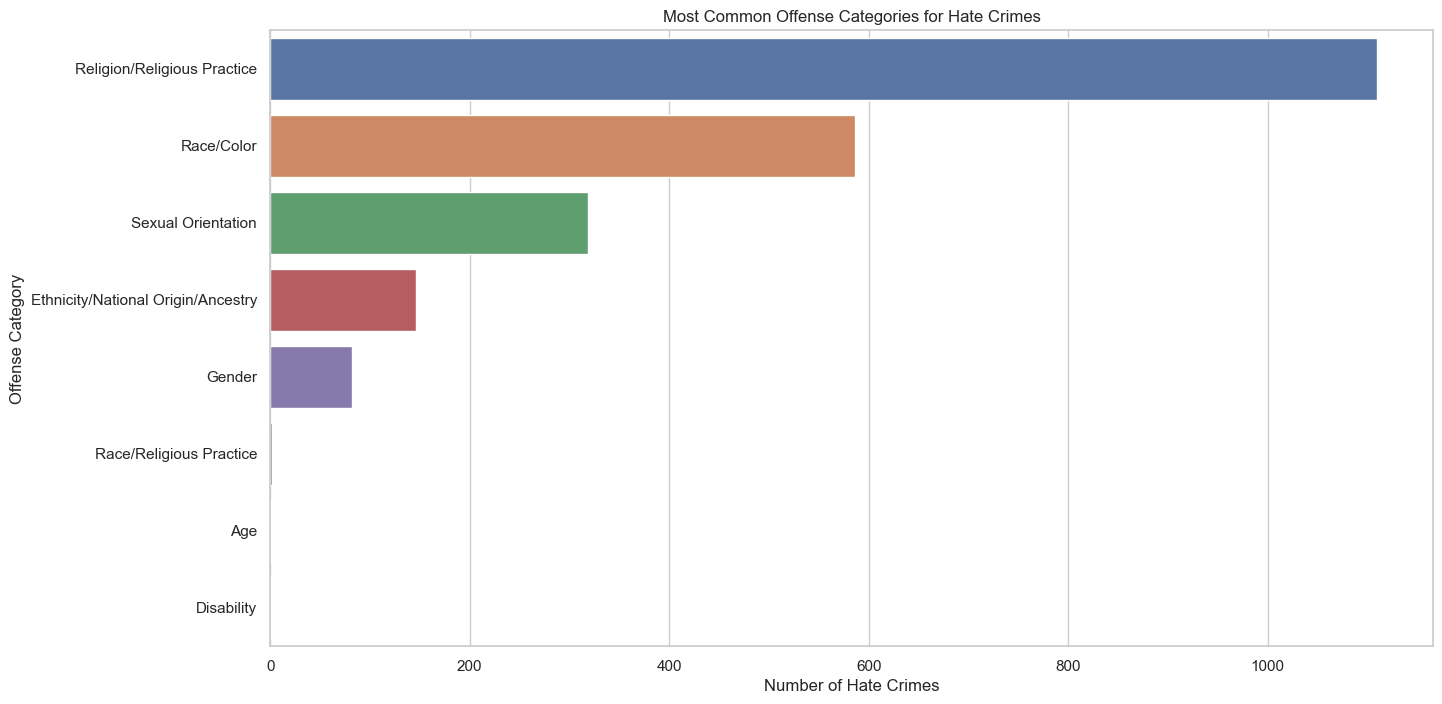

In [118]:
# Plot the most common offense categories
plt.figure(figsize=(15, 8))
sns.countplot(y='Offense Category', data=df_hate_crimes, order = df_hate_crimes['Offense Category'].value_counts().index)
plt.title('Most Common Offense Categories for Hate Crimes')
plt.xlabel('Number of Hate Crimes')
plt.ylabel('Offense Category')
plt.show()

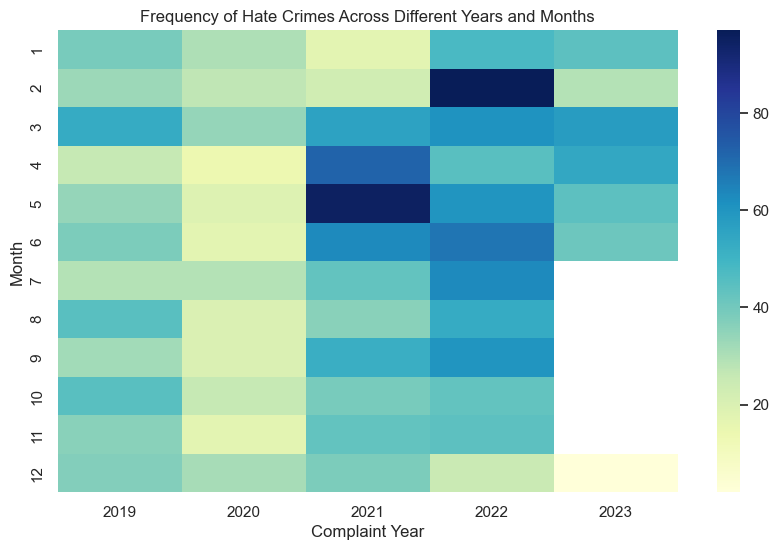

In [119]:
# Heatmap: Frequency of hate crimes across different years and months
plt.figure(figsize=(10, 6))
heatmap_data = df_hate_crimes.groupby(['Complaint Year Number', 'Month Number']).size().reset_index(name='Frequency')
heatmap_data_pivot = heatmap_data.pivot("Month Number", "Complaint Year Number", "Frequency")
sns.heatmap(heatmap_data_pivot, cmap="YlGnBu")
plt.title('Frequency of Hate Crimes Across Different Years and Months')
plt.xlabel('Complaint Year')
plt.ylabel('Month')
plt.show()

The heatmap reveals variations in the frequency of hate crimes across different years and months. We can observe an increase in hate crime in 2021 and 2022.

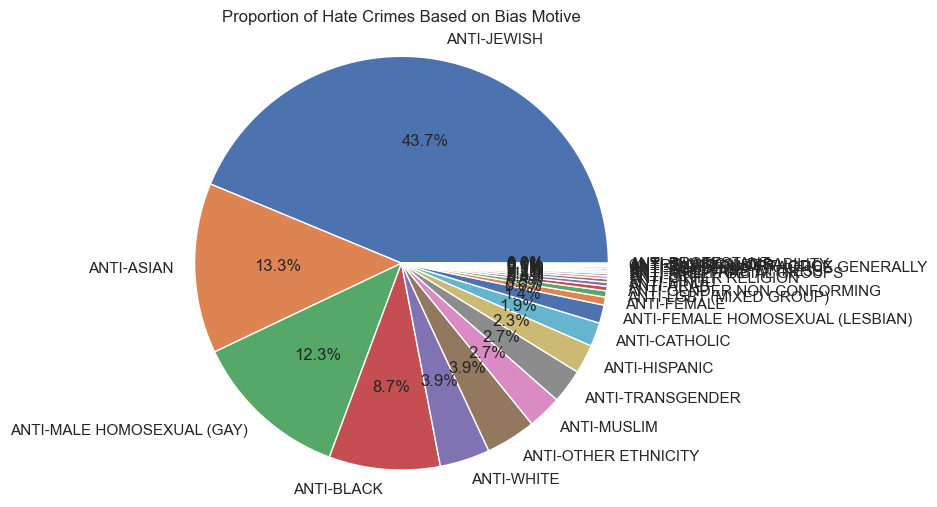

In [120]:
# Pie Chart: Proportion of hate crimes based on 'Bias Motive'
plt.figure(figsize=(10, 6))
bias_motive_data = df_hate_crimes['Bias Motive Description'].value_counts()
plt.pie(bias_motive_data, labels = bias_motive_data.index, autopct='%1.1f%%')
plt.title('Proportion of Hate Crimes Based on Bias Motive')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The pie chart categorizing hate crimes by bias motive, here we can see majority of hate crime is Anti-Jewish followed by Anit-Asian. 

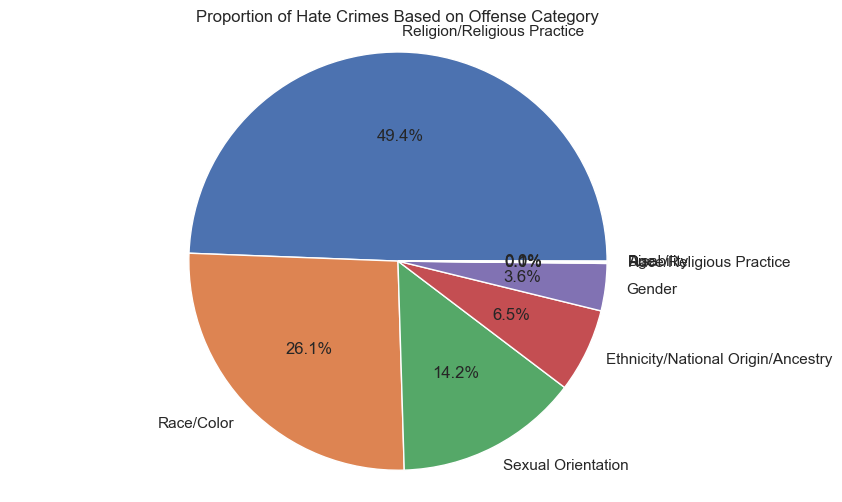

In [121]:
# Pie Chart: Proportion of hate crimes based on 'Offense Category'
plt.figure(figsize=(10, 6))
offense_category_data = df_hate_crimes['Offense Category'].value_counts()
plt.pie(offense_category_data, labels = offense_category_data.index, autopct='%1.1f%%')
plt.title('Proportion of Hate Crimes Based on Offense Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The pie chart above provides insights into the types of offenses that are most commonly classified as hate crimes. Here we can observe Religious groups and Ethinicity (race/color) has the majority of hate crime offence. Knowing this can help law enforcement agencies prepare and allocate resources more effectively.

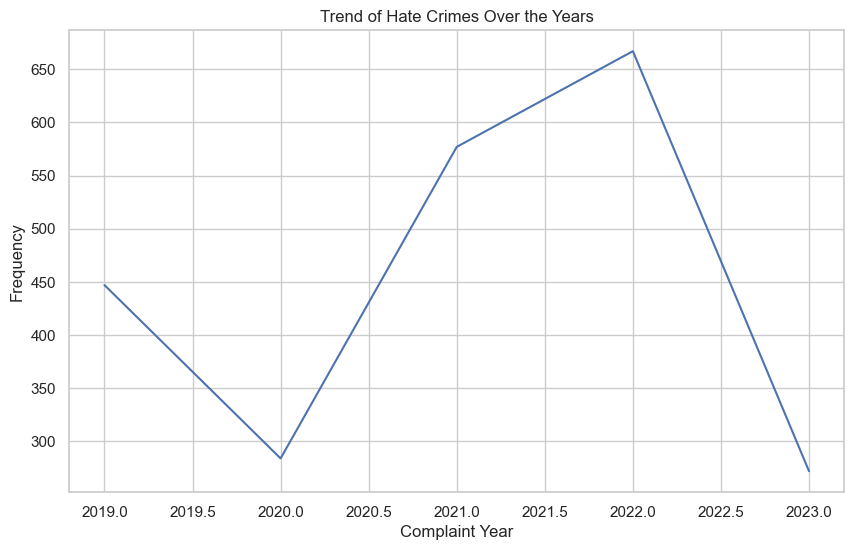

In [122]:
# Time Series Plot: Trend of hate crimes over the years
plt.figure(figsize=(10, 6))
time_series_data = df_hate_crimes.groupby(['Complaint Year Number']).size().reset_index(name='Frequency')
sns.lineplot(x='Complaint Year Number', y='Frequency', data=time_series_data)
plt.title('Trend of Hate Crimes Over the Years')
plt.xlabel('Complaint Year')
plt.ylabel('Frequency')
plt.show()

The line chart indicates how the frequency of hate crimes has changed over the years. Like the heatmap, the line chart also confirmed that 2022 has the highest hate crime. This is vital for assessing the effectiveness of policies aimed at reducing hate crimes.

#### NYPD Shooting Incident Data:

Let's move on to NYPD Shooting Incident Data, here we plan to analyze the data by focusing on temporal and spatial aspects. Specifically, we'll examine trends over time to identify any seasonal patterns or long-term changes. We'll also leverage the geographical coordinates to visualize the distribution of incidents across different locations. This multi-faceted approach will provide us with a comprehensive understanding of the data allowing us to draw more actionable insights.

In [123]:
# Load the NYPD Shooting Incident data into a DataFrame
df_shooting_incident = pd.read_csv('NYPD_Shooting_Incident_Data__Historic_.csv')

# Displaythe first 5 rows of the dataset
df_shooting_incident.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,NaN,105,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,NaN,108,0.0,NaN,NaN,True,...,NaN,NaN,25-44,M,WHITE,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10/09/2015,18:30:00,BRONX,NaN,44,0.0,NaN,NaN,False,...,NaN,NaN,<18,M,WHITE HISPANIC,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,NaN,47,0.0,NaN,NaN,True,...,M,BLACK,45-64,M,BLACK,1.024922e+06,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)


In [124]:
# Identify columns with missing values and the number of missing values in each
missing_values_count = df_shooting_incident.isnull().sum()
missing_values_count[missing_values_count > 0]

LOC_OF_OCCUR_DESC     25596
JURISDICTION_CODE         2
LOC_CLASSFCTN_DESC    25596
LOCATION_DESC         14977
PERP_AGE_GROUP         9344
PERP_SEX               9310
PERP_RACE              9310
Latitude                 10
Longitude                10
Lon_Lat                  10
dtype: int64

In [125]:
# Handle Missing Values:

# Drop Missing: Removing rows where 'JURISDICTION_CODE', 'Latitude', 'Longitude', and 'Lon_Lat' are missing
df_shooting_incident.dropna(subset=['JURISDICTION_CODE', 'Latitude', 'Longitude', 'Lon_Lat'], inplace=True)

# Imputation: For columns like 'PERP_AGE_GROUP', 'PERP_SEX', and 'PERP_RACE', replacing NaNs with a placeholder 'UNKNOWN'
for column in ['PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE']:
    df_shooting_incident[column].fillna('UNKNOWN', inplace=True)

# Leave as-is for columns 'LOC_OF_OCCUR_DESC', 'LOC_CLASSFCTN_DESC', and 'LOCATION_DESC', as they won't be used for now

#  Date-Time Conversion: Converting 'OCCUR_DATE' to a DateTime object
df_shooting_incident['OCCUR_DATE'] = pd.to_datetime(df_shooting_incident['OCCUR_DATE'])

#  Data Types: Converting 'JURISDICTION_CODE' and 'PRECINCT' to integers
df_shooting_incident['JURISDICTION_CODE'] = df_shooting_incident['JURISDICTION_CODE'].astype(int)
df_shooting_incident['PRECINCT'] = df_shooting_incident['PRECINCT'].astype(int)

# Confirming that the data cleaning steps are applied successfully
df_shooting_incident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27300 entries, 0 to 27311
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   INCIDENT_KEY             27300 non-null  int64         
 1   OCCUR_DATE               27300 non-null  datetime64[ns]
 2   OCCUR_TIME               27300 non-null  object        
 3   BORO                     27300 non-null  object        
 4   LOC_OF_OCCUR_DESC        1706 non-null   object        
 5   PRECINCT                 27300 non-null  int32         
 6   JURISDICTION_CODE        27300 non-null  int32         
 7   LOC_CLASSFCTN_DESC       1706 non-null   object        
 8   LOCATION_DESC            12324 non-null  object        
 9   STATISTICAL_MURDER_FLAG  27300 non-null  bool          
 10  PERP_AGE_GROUP           27300 non-null  object        
 11  PERP_SEX                 27300 non-null  object        
 12  PERP_RACE                27300 n

#### Data Cleaning Summary:
The data cleaning process has been successfully completed for the NYPD Shooting Incident dataset with the following steps:

##### Handle Missing Values:
Rows with missing values in columns such as JURISDICTION_CODE, Latitude, Longitude, and Lon_Lat are removed.
Columns PERP_AGE_GROUP, PERP_SEX, and PERP_RACE are imputed with a placeholder value of 'UNKNOWN'.
Columns with a large number of missing values like LOC_OF_OCCUR_DESC, LOC_CLASSFCTN_DESC, and LOCATION_DESC are left as-is for now.
##### Date-Time Conversion:
The OCCUR_DATE column is converted to a DateTime object for easier time-based analysis.
##### Data Types:
The JURISDICTION_CODE and PRECINCT columns are converted to integers for consistency.

The dataset now has 27,300 entries and 21 columns each with the appropriate data types.

In [126]:
# Generate descriptive statistics for the numerical columns
summary_stats = df_shooting_incident.describe()

# Correlation Analysis: Calculating the correlation matrix for numerical columns
correlation_matrix = df_shooting_incident.corr()

summary_stats, correlation_matrix

(       INCIDENT_KEY      PRECINCT  JURISDICTION_CODE    X_COORD_CD  \
 count  2.730000e+04  27300.000000       27300.000000  2.730000e+04   
 mean   1.208128e+08     65.636374           0.327033  1.009451e+06   
 std    7.338235e+07     27.303409           0.737851  1.837915e+04   
 min    9.953245e+06      1.000000           0.000000  9.149281e+05   
 25%    6.385993e+07     44.000000           0.000000  1.000033e+06   
 50%    9.034050e+07     68.000000           0.000000  1.007742e+06   
 75%    1.885873e+08     81.000000           0.000000  1.016838e+06   
 max    2.611902e+08    123.000000           2.000000  1.066815e+06   
 
           Y_COORD_CD      Latitude     Longitude  
 count   27300.000000  27300.000000  27300.000000  
 mean   208127.706930     40.737891    -73.909050  
 std     31886.586431      0.087527      0.066274  
 min    125756.718750     40.511586    -74.249303  
 25%    182832.343750     40.668478    -73.943034  
 50%    194478.093750     40.700318    -73.9152

##### Summary Statistics:
The dataset contains 27,300 records after cleaning. The precincts range from 1 to 123 with a mean value of approximately 65.64.
The Latitude and Longitude columns have a range of 40.51 to 40.91 and -74.25 to -73.70 respectively indicating the geographical spread of the incidents.
##### Correlation Analysis:
PRECINCT and Latitude/Y_COORD_CD are negatively correlated with coefficients of approximately -0.65 indicating that as the precinct number increases, the latitude generally decreases. This could be geographically informative.
X_COORD_CD and Longitude are highly positively correlated (almost 1) as expected since they both represent longitudinal data.
No high correlation is observed with the STATISTICAL_MURDER_FLAG suggesting that it is not linearly related to other numerical variables in the dataset.

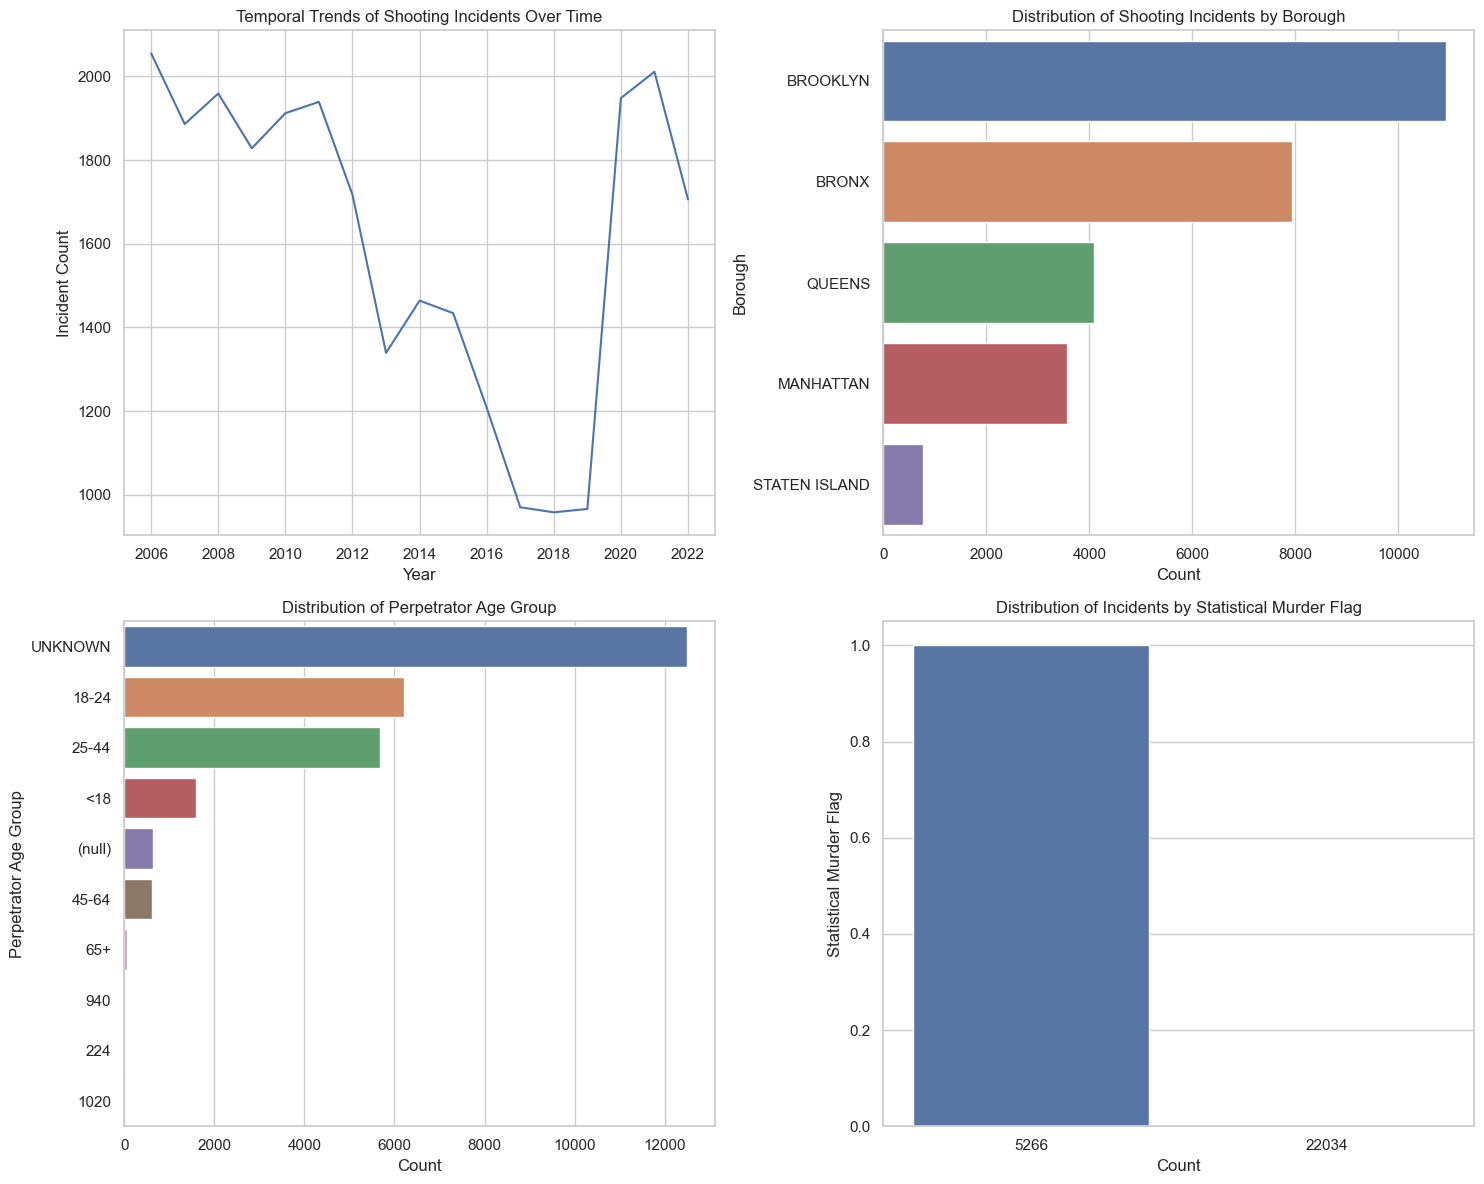

In [127]:
# Exploratory Data Analysis (EDA)

# Temporal Trends: Creating a line plot for the number of incidents over time
df_shooting_incident['OCCUR_YEAR'] = df_shooting_incident['OCCUR_DATE'].dt.year
temporal_trends = df_shooting_incident.groupby('OCCUR_YEAR').size().reset_index(name='Incident_Count')

# Categorical Insights: Bar plots for 'BORO' and 'PERP_AGE_GROUP'
boro_counts = df_shooting_incident['BORO'].value_counts().reset_index().rename(columns={'index': 'BORO', 'BORO': 'Count'})
age_group_counts = df_shooting_incident['PERP_AGE_GROUP'].value_counts().reset_index().rename(columns={'index': 'PERP_AGE_GROUP', 'PERP_AGE_GROUP': 'Count'})

# Statistical Flags: Distribution of incidents flagged as statistical murders
stat_murder_counts = df_shooting_incident['STATISTICAL_MURDER_FLAG'].value_counts().reset_index().rename(columns={'index': 'STATISTICAL_MURDER_FLAG', 'STATISTICAL_MURDER_FLAG': 'Count'})

# Plotting the EDA figures
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Line plot for Temporal Trends
sns.lineplot(x='OCCUR_YEAR', y='Incident_Count', data=temporal_trends, ax=axes[0, 0])
axes[0, 0].set_title('Temporal Trends of Shooting Incidents Over Time')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Incident Count')

# Bar plot for BORO
sns.barplot(x='Count', y='BORO', data=boro_counts, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Shooting Incidents by Borough')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Borough')

# Bar plot for PERP_AGE_GROUP
sns.barplot(x='Count', y='PERP_AGE_GROUP', data=age_group_counts, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Perpetrator Age Group')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Perpetrator Age Group')

# Bar plot for STATISTICAL_MURDER_FLAG
sns.barplot(x='Count', y='STATISTICAL_MURDER_FLAG', data=stat_murder_counts, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Incidents by Statistical Murder Flag')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Statistical Murder Flag')

plt.tight_layout()
plt.show()

#### The Exploratory Data Analysis (EDA) has generated four key visualizations:
##### Temporal Trends:

The line plot indicates a general decline in the number of shooting incidents over the years, although there are some years with noticeable spikes. This could be useful for evaluating the effectiveness of gun control or public safety measures.

##### Distribution by Borough:
The bar plot shows that Brooklyn has the highest number of shooting incidents followed by the Bronx and Queens. This data could be useful for resource allocation by law enforcement.

##### Perpetrator Age Group: 
The majority of the perpetrators fall into the "UNKNOWN" category, which suggests that many cases are unsolved or that the age group is not recorded. Among known age groups, 25-44 has the highest count.

##### Statistical Murder Flag:
A very small number of incidents are flagged as statistical murders compared to those that are not. This could inform further investigations into what distinguishes these particular incidents.

Each of these visualizations provides actionable insights into different aspects of shooting incidents in New York City. For example, law enforcement could focus more resources on Brooklyn and target specific age groups for preventative measures based on these findings.

#### Additional In-depth Analysis on NYPD Shooting Dataset:

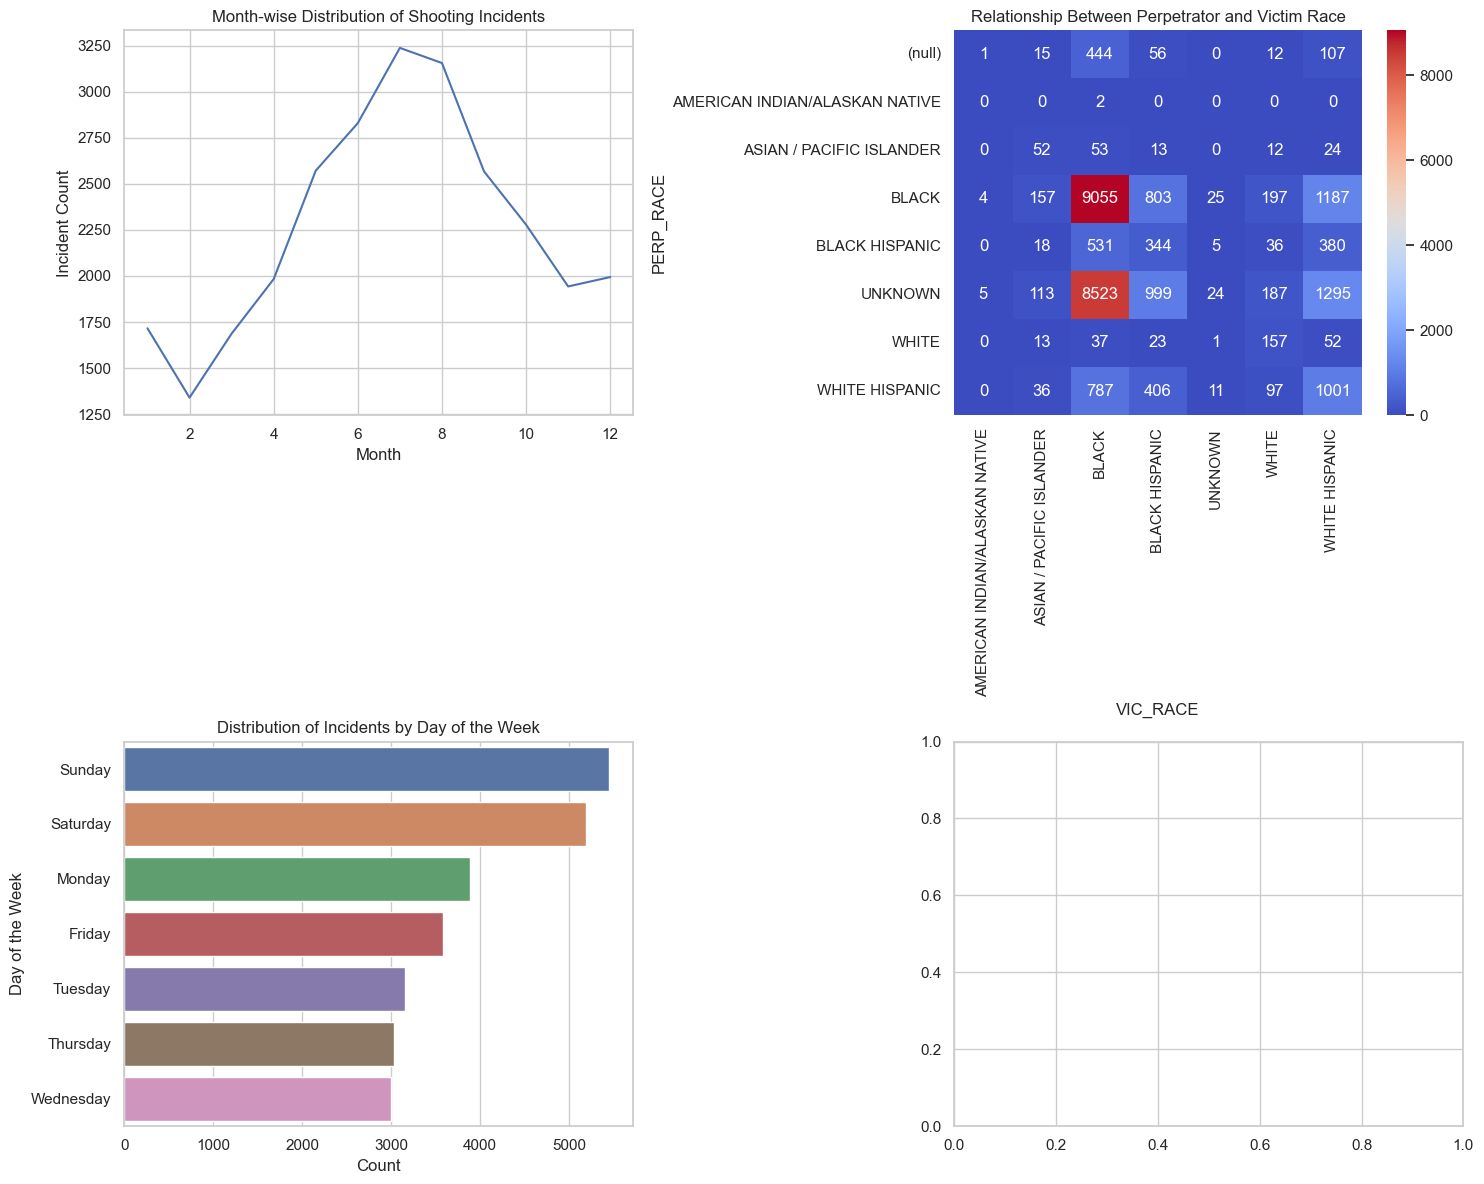

In [128]:
# Month-wise distribution of incidents
df_shooting_incident['OCCUR_MONTH'] = df_shooting_incident['OCCUR_DATE'].dt.month
monthwise_counts = df_shooting_incident.groupby('OCCUR_MONTH').size().reset_index(name='Incident_Count')

# Relationship between Perpetrator and Victim Race
perp_victim_race = df_shooting_incident.groupby(['PERP_RACE', 'VIC_RACE']).size().reset_index(name='Incident_Count')

# Distribution of incidents based on the day of the week
df_shooting_incident['OCCUR_DAY_OF_WEEK'] = df_shooting_incident['OCCUR_DATE'].dt.day_name()
daywise_counts = df_shooting_incident['OCCUR_DAY_OF_WEEK'].value_counts().reset_index().rename(columns={'index': 'OCCUR_DAY_OF_WEEK', 'OCCUR_DAY_OF_WEEK': 'Count'})

# Plotting the in-depth EDA figures
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Line plot for Month-wise distribution
sns.lineplot(x='OCCUR_MONTH', y='Incident_Count', data=monthwise_counts, ax=axes[0, 0])
axes[0, 0].set_title('Month-wise Distribution of Shooting Incidents')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Incident Count')

# Heatmap for Relationship between Perpetrator and Victim Race
sns.heatmap(perp_victim_race.pivot('PERP_RACE', 'VIC_RACE', 'Incident_Count').fillna(0), annot=True, fmt=".0f", cmap='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('Relationship Between Perpetrator and Victim Race')

# Bar plot for incidents based on the day of the week
sns.barplot(x='Count', y='OCCUR_DAY_OF_WEEK', data=daywise_counts, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Incidents by Day of the Week')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Day of the Week')

plt.tight_layout()
plt.show()

#### Some key insights for the NYPD Shooting Incident dataset:

##### Month-wise Distribution:
The number of shooting incidents peaks in the summer months with July having the highest number of incidents (3,237) followed closely by August (3,155) and June (2,829). The incidents are least frequent in the winter months with February having the lowest count (1,340).

##### Relationship Between Perpetrator and Victim Race:
The majority of incidents involve both the perpetrator and victim being of the same race, particularly Black. There are notable numbers of incidents where the race of either the perpetrator or victim is unknown.

##### Distribution of Incidents Based on the Day of the Week:
Sundays and Saturdays have the highest number of incidents with 5,449 and 5,192 respectively. The weekdays show relatively less variation in incident counts but are generally lower than weekends.

These findings indicate seasonal, racial, and weekly patterns in shooting incidents which could be useful for resource allocation and preventive measures. For example, law enforcement agencies could increase patrols during summer months and focus on weekends when incidents are most frequent. The racial data could also serve as a basis for community outreach or further investigations into social factors that contribute to these incidents. These insights could be pivotal for targeted law enforcement and policy interventions.

### NYPD_Arrests_Data__Historic:

Moving on to the NYPD_Arrests_Data__Historic, we will do data preprossing and EDA to gain insight from this dataset.

In [129]:
# Load the dataset 
df_arrests = pd.read_csv('NYPD_Arrests_Data__Historic_.csv')

# Displaythe first 5 rows of the dataset
df_arrests.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,236791704,11/22/2021,581.0,NaN,NaN,NaN,PL 2225001,M,M,28,0.0,45-64,M,BLACK,997427.0,230378.0,40.799009,-73.952409,POINT (-73.95240854099995 40.799008797000056)
1,237354740,12/04/2021,153.0,RAPE 3,104.0,RAPE,PL 1302502,F,B,41,0.0,25-44,M,WHITE HISPANIC,1013232.0,236725.0,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034)
2,236081433,11/09/2021,681.0,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,Q,113,0.0,25-44,M,BLACK,1046367.0,186986.0,40.679700,-73.776047,POINT (-73.77604736799998 40.67970040800003)
3,32311380,06/18/2007,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,Q,27,1.0,18-24,M,BLACK,NaN,NaN,NaN,NaN,NaN
4,192799737,01/26/2019,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045)


In [130]:
# Data Cleaning

# Drop any duplicate rows
df_arrests.drop_duplicates(inplace=True)

# Remove rows with missing or null values in crucial columns
df_arrests.dropna(subset=['ARREST_DATE', 'OFNS_DESC', 'LAW_CODE'], inplace=True)

# Convert 'ARREST_DATE' to datetime format
df_arrests['ARREST_DATE'] = pd.to_datetime(df_arrests['ARREST_DATE'])

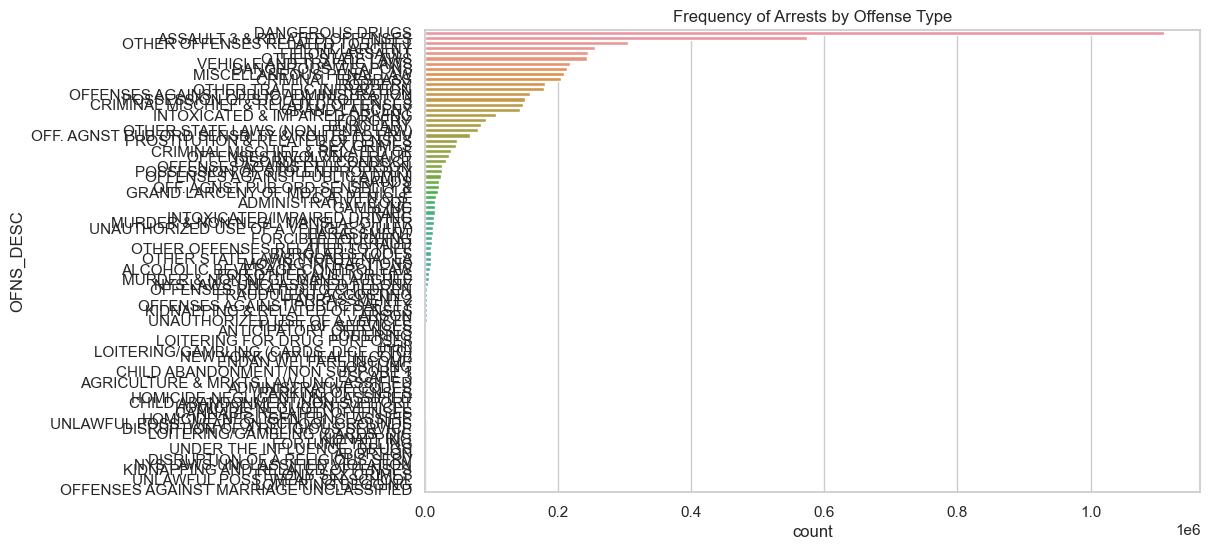

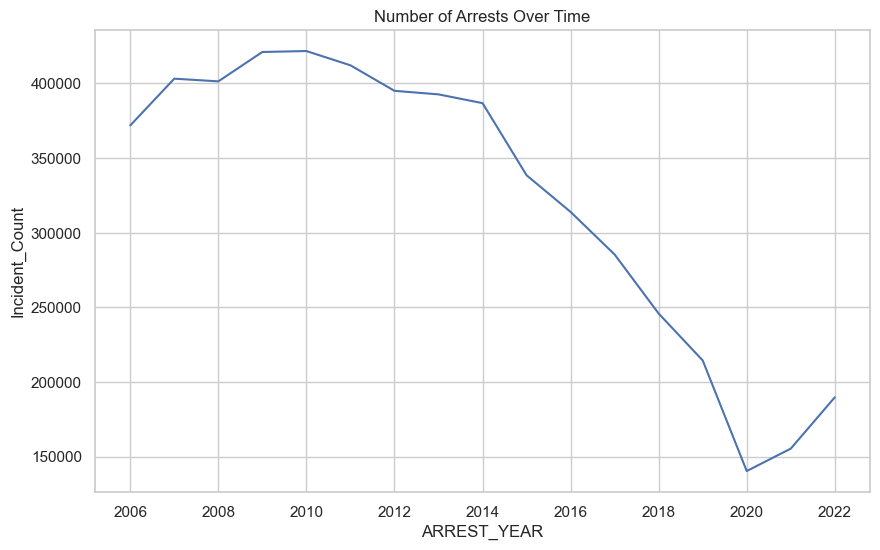

In [131]:
# Exploratory Data Analysis (EDA):

# Frequency of arrests by offense type
plt.figure(figsize=(10, 6))
sns.countplot(data=df_arrests, y='OFNS_DESC', order=df_arrests['OFNS_DESC'].value_counts().index)
plt.title('Frequency of Arrests by Offense Type')
plt.show()

# Arrests over time
df_arrests['ARREST_YEAR'] = df_arrests['ARREST_DATE'].dt.year
yearwise_counts = df_arrests.groupby('ARREST_YEAR').size().reset_index(name='Incident_Count')
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearwise_counts, x='ARREST_YEAR', y='Incident_Count')
plt.title('Number of Arrests Over Time')
#print(year_counts)
plt.show()

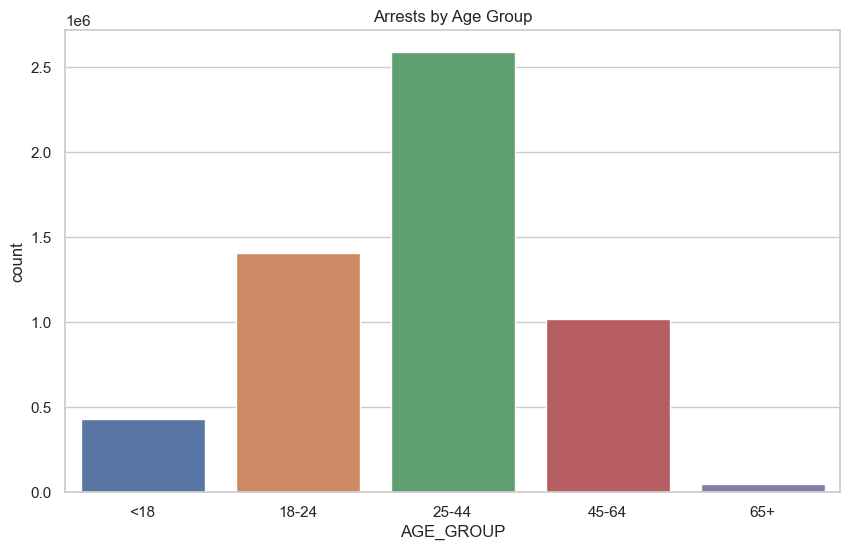

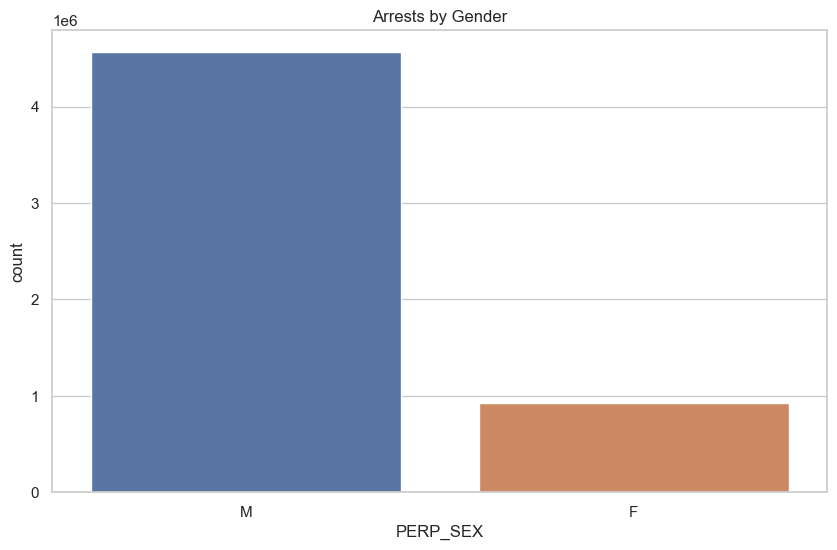

In [132]:
import matplotlib.pyplot as plt
# Arrests by age group
plt.figure(figsize=(10, 6))
sns.countplot(data=df_arrests, x='AGE_GROUP', order=['<18', '18-24', '25-44', '45-64', '65+'])
plt.title('Arrests by Age Group')
plt.show()

# Arrests by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df_arrests, x='PERP_SEX')
plt.title('Arrests by Gender')
plt.show()

Arrest counts by year:
2010    421681
2009    421058
2011    412131
2007    403178
2008    401372
2012    395040
2013    392663
2014    386787
2006    371860
2015    338500
2016    313933
2017    285418
2018    245848
2019    214458
2022    189774
2021    155404
2020    140376
Name: ARREST_YEAR, dtype: int64


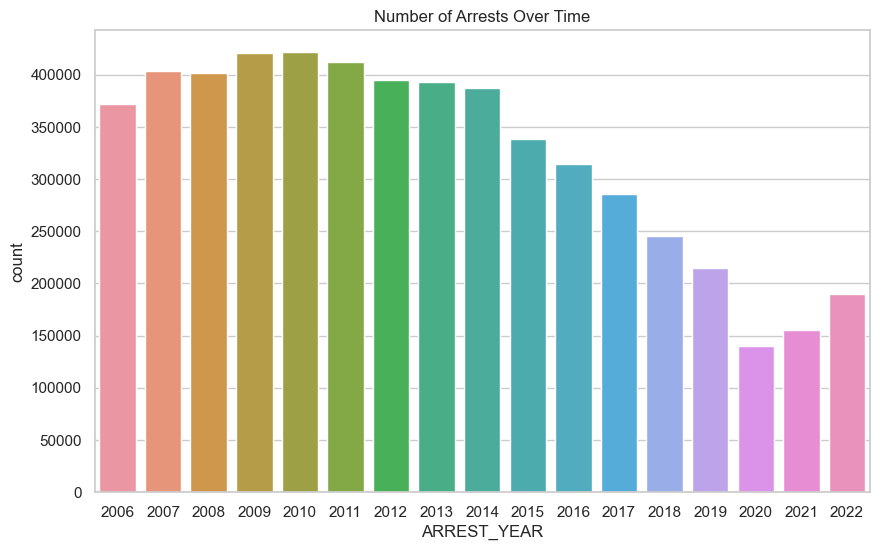

In [133]:
# Converting 'ARREST_DATE' to datetime format
df_arrests['ARREST_DATE'] = pd.to_datetime(df_arrests['ARREST_DATE'])

# Arrests by year
df_arrests['ARREST_YEAR'] = df_arrests['ARREST_DATE'].dt.year
year_counts = df_arrests['ARREST_YEAR'].value_counts()
print("Arrest counts by year:")
print(year_counts)

plt.figure(figsize=(10, 6))
sns.countplot(data=df_arrests, x='ARREST_YEAR')
plt.title('Number of Arrests Over Time')
plt.show()

Arrest counts by offense type:
DANGEROUS DRUGS                           1109839
ASSAULT 3 & RELATED OFFENSES               573150
OTHER OFFENSES RELATED TO THEFT            304191
PETIT LARCENY                              255208
FELONY ASSAULT                             244707
                                           ...   
KIDNAPPING AND RELATED OFFENSES                 2
FELONY SEX CRIMES                               2
UNLAWFUL POSS. WEAP. ON SCHOOL                  2
LOITERING,BEGGING                               1
OFFENSES AGAINST MARRIAGE UNCLASSIFIED          1
Name: OFNS_DESC, Length: 90, dtype: int64


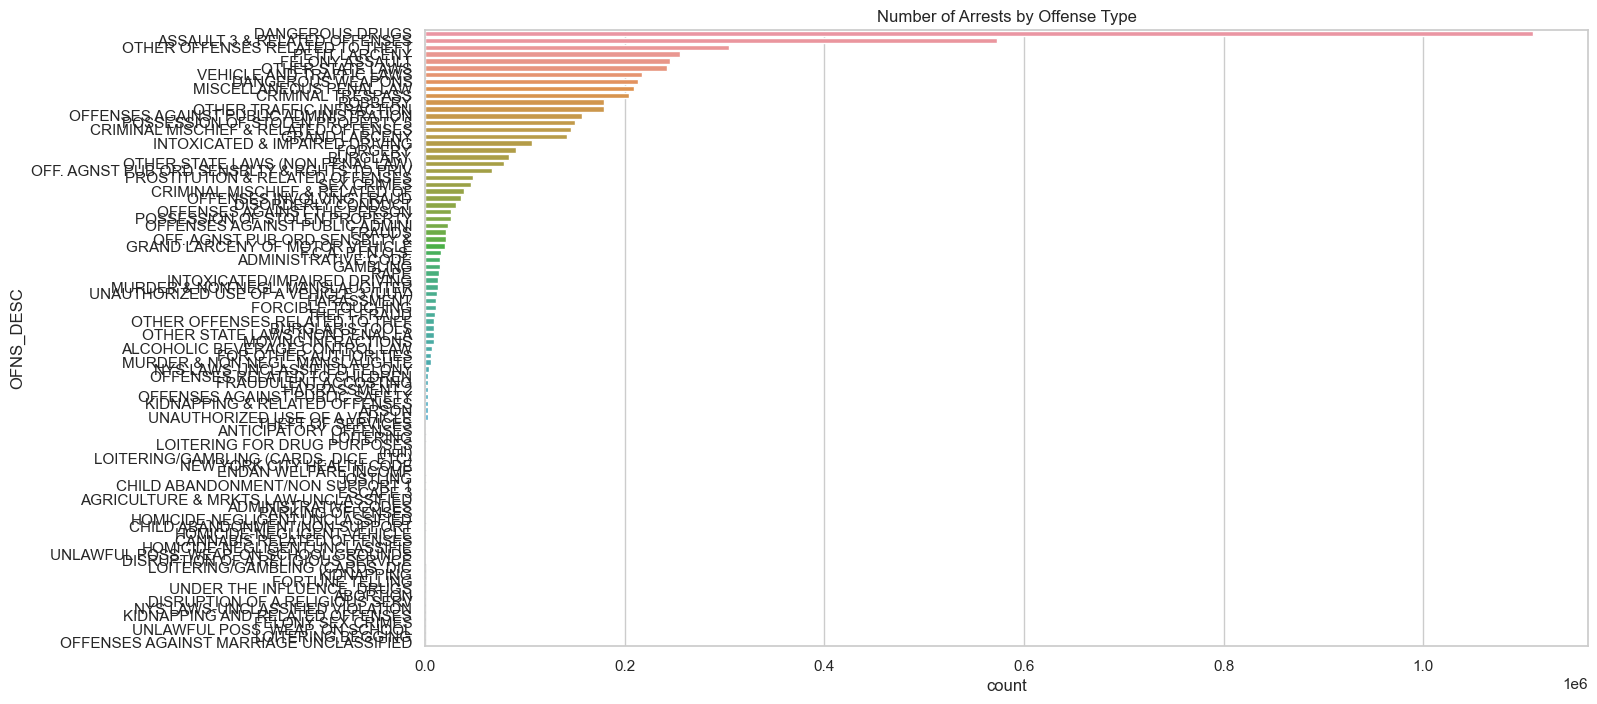

In [134]:
# Arrests by offense type
offense_counts = df_arrests['OFNS_DESC'].value_counts()
print("Arrest counts by offense type:")
print(offense_counts)

plt.figure(figsize=(15, 8))
sns.countplot(data=df_arrests, y='OFNS_DESC', order = df_arrests['OFNS_DESC'].value_counts().index)
plt.title('Number of Arrests by Offense Type')
plt.show()

Arrest counts by gender:
M    4565500
F     923981
Name: PERP_SEX, dtype: int64


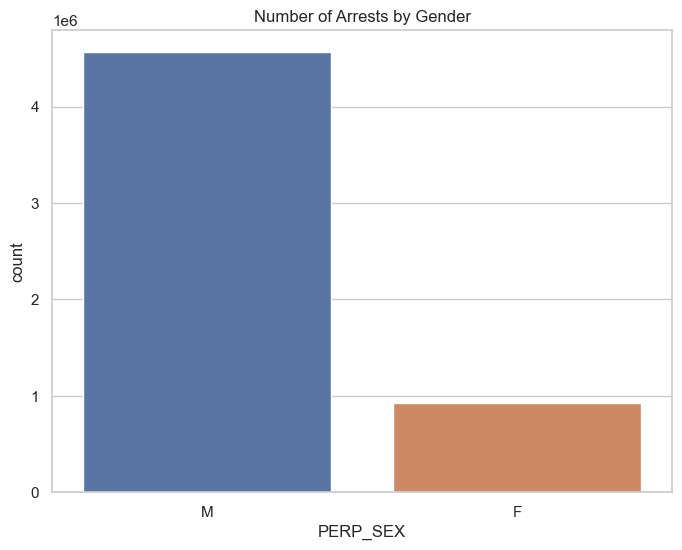

In [135]:
# Arrests by gender
gender_counts = df_arrests['PERP_SEX'].value_counts()
print("Arrest counts by gender:")
print(gender_counts)

plt.figure(figsize=(8, 6))
sns.countplot(data=df_arrests, x='PERP_SEX')
plt.title('Number of Arrests by Gender')
plt.show()

Arrest counts by age group:
25-44    2587422
18-24    1406890
45-64    1016674
<18       429434
65+        48870
          ...   
1942           1
1024           1
1948           1
1922           1
330            1
Name: AGE_GROUP, Length: 91, dtype: int64


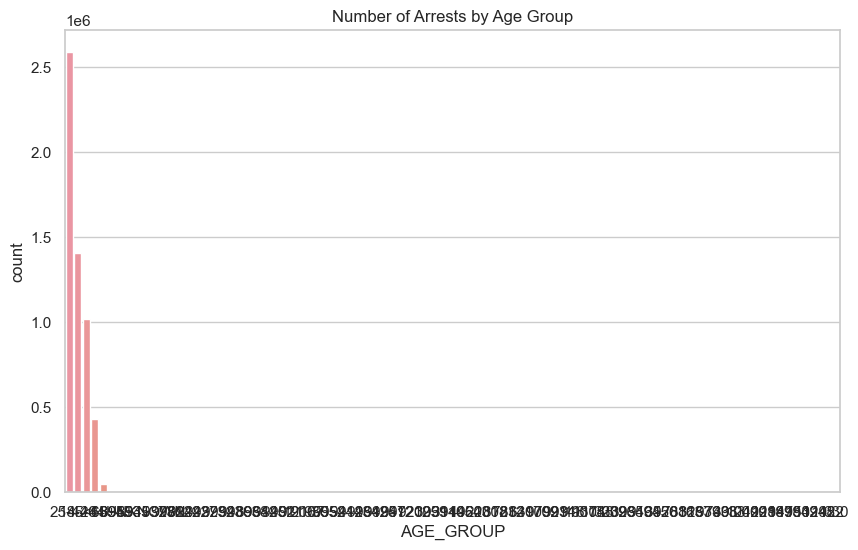

In [136]:
# Age group of arrested persons
age_group_counts = df_arrests['AGE_GROUP'].value_counts()
print("Arrest counts by age group:")
print(age_group_counts)

plt.figure(figsize=(10, 6))
sns.countplot(data=df_arrests, x='AGE_GROUP', order = df_arrests['AGE_GROUP'].value_counts().index)
plt.title('Number of Arrests by Age Group')
plt.show()

##### Arrest Counts by Year:
The number of arrests has been generally decreasing over the years with the most significant declines occurring after 2016. The data for 2022 might be partial, given that the year is not over yet. The highest number of arrests occurred in 2010 with 421,681 cases and the lowest in 2020 with 140,376 cases. This could potentially be attributed to the COVID-19 pandemic affecting law enforcement activities.
##### Arrest Counts by Offense Type:
The most common type of offense leading to arrests is "Dangerous Drugs," with 1,109,839 cases, followed by "Assault 3 & Related Offenses" with 573,150 cases. Some offense types have extremely low counts (like "Kidnapping and Related Offenses") which might require specialized attention.
##### Arrest Counts by Gender:
A significantly higher number of males (4,565,500) have been arrested compared to females (923,981). This could potentially be indicative of underlying social or systemic issues.
##### Arrest Counts by Age Group:
The age group with the most arrests is "25-44" accounting for 2,587,422 cases followed by the "18-24" age group with 1,406,890 cases.
Overall, these insights is crucial for policy formulation, law enforcement strategies, and social programs aimed at crime prevention and rehabilitation. 

#### Additional In-depth Analysis on NYPD Arrest Dataset

Monthly Arrest Counts:
     ARREST_MONTH  Incident_Count
0              1          481532
1              2          449115
2              3          499744
3              4          468178
4              5          486778
5              6          452942
6              7          456945
7              8          469310
8              9          442791
9             10          474100
10            11          421296
11            12          386750


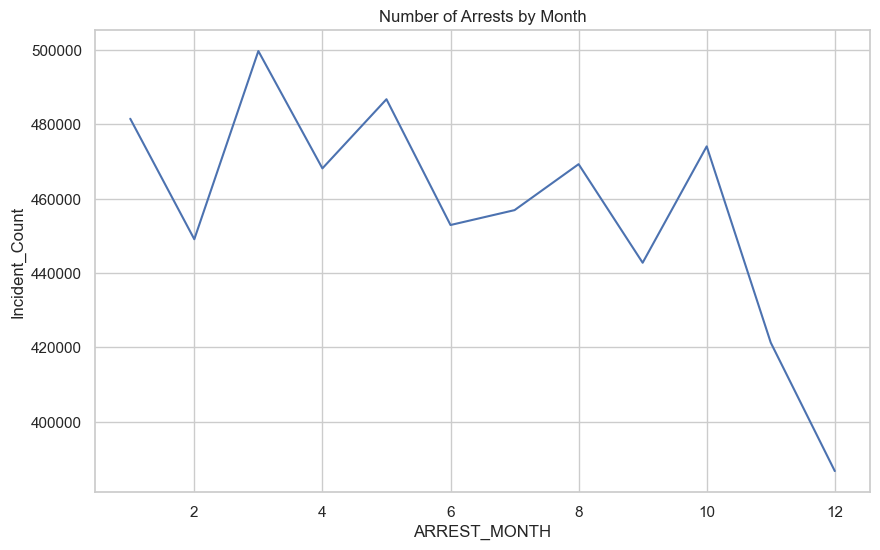

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Temporal Trends
df_arrests['ARREST_DATE'] = pd.to_datetime(df_arrests['ARREST_DATE'])  # Convert to datetime if not already
df_arrests['ARREST_MONTH'] = df_arrests['ARREST_DATE'].dt.month
monthly_counts = df_arrests.groupby('ARREST_MONTH').size().reset_index(name='Incident_Count')
print("Monthly Arrest Counts:\n", monthly_counts)
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_counts, x='ARREST_MONTH', y='Incident_Count')
plt.title('Number of Arrests by Month')
plt.show()

Offense Type by Age Group:
                        OFNS_DESC AGE_GROUP   Count
0   ASSAULT 3 & RELATED OFFENSES     18-24  130321
1   ASSAULT 3 & RELATED OFFENSES      1916       2
2   ASSAULT 3 & RELATED OFFENSES      1922       1
3   ASSAULT 3 & RELATED OFFENSES      1928       1
4   ASSAULT 3 & RELATED OFFENSES       194       1
..                           ...       ...     ...
90                 PETIT LARCENY     45-64   69442
91                 PETIT LARCENY       65+    3506
92                 PETIT LARCENY       895       1
93                 PETIT LARCENY       928       1
94                 PETIT LARCENY       <18   20135

[95 rows x 3 columns]


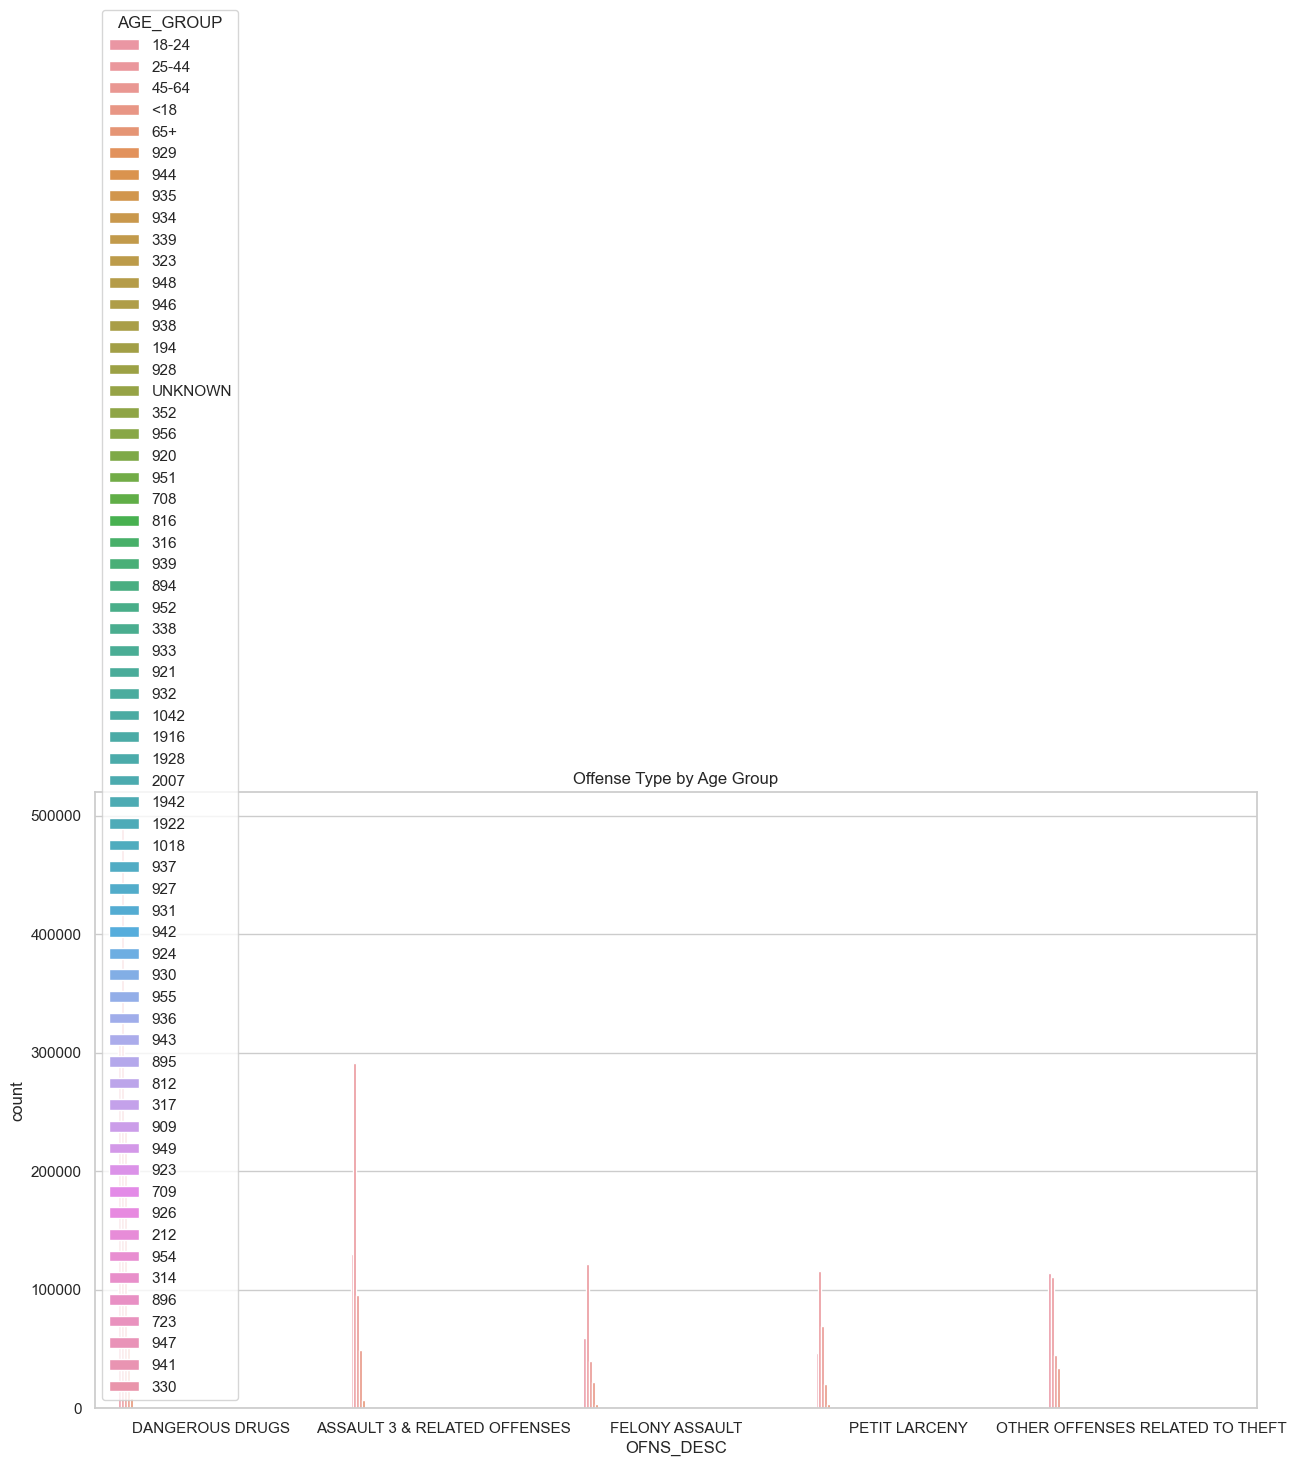

In [138]:
# Demographic Analysis by Offense Type and Age Group (Top 5 offenses)
top_offenses = df_arrests['OFNS_DESC'].value_counts().index[:5]
filtered_df = df_arrests[df_arrests['OFNS_DESC'].isin(top_offenses)]
age_group_counts = filtered_df.groupby(['OFNS_DESC', 'AGE_GROUP']).size().reset_index(name='Count')
print("Offense Type by Age Group:\n", age_group_counts)
plt.figure(figsize=(15, 8))
sns.countplot(data=filtered_df, x='OFNS_DESC', hue='AGE_GROUP')
plt.title('Offense Type by Age Group')
plt.show()

Correlation Matrix:
                    ARREST_KEY     PD_CD     KY_CD  ARREST_PRECINCT  \
ARREST_KEY           1.000000 -0.117991 -0.104464         0.022303   
PD_CD               -0.117991  1.000000  0.327294         0.009322   
KY_CD               -0.104464  0.327294  1.000000        -0.005557   
ARREST_PRECINCT      0.022303  0.009322 -0.005557         1.000000   
JURISDICTION_CODE    0.004554  0.008802 -0.008625        -0.032187   
X_COORD_CD          -0.002687 -0.002824 -0.003677         0.303150   
Y_COORD_CD          -0.021516  0.014698  0.011372        -0.076381   
Latitude            -0.021650  0.014623  0.011343        -0.077965   
Longitude           -0.002938 -0.002551 -0.003488         0.303028   
ARREST_YEAR          0.987731 -0.112993 -0.101854         0.021956   
ARREST_MONTH         0.070907 -0.014797 -0.017654        -0.001696   

                   JURISDICTION_CODE  X_COORD_CD  Y_COORD_CD  Latitude  \
ARREST_KEY                  0.004554   -0.002687   -0.021516 -0.

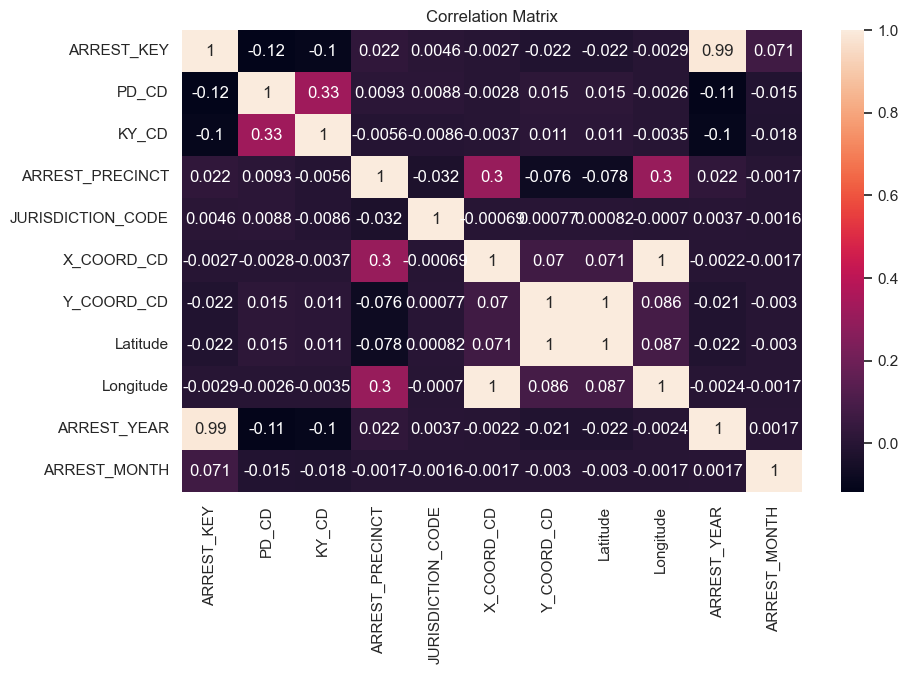

Outliers in Year-wise data: Series([], Name: ARREST_YEAR, dtype: int64)


In [139]:
# Correlations
correlation_matrix = df_arrests.corr()
print("Correlation Matrix:\n", correlation_matrix)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Anomalies and Outliers (Year-wise)
df_arrests['ARREST_YEAR'] = df_arrests['ARREST_DATE'].dt.year  # Extract year from the date
yearly_counts = df_arrests['ARREST_YEAR'].value_counts()
outliers = yearly_counts[(yearly_counts - yearly_counts.mean()).abs() > 1.96 * yearly_counts.std()]
print("Outliers in Year-wise data:", outliers)

##### Based on the EDA results, here are key actionable insights that can be drawn:

##### Temporal Insights:
Seasonal Fluctuations: 
With the highest number of arrests happening in March and May, and the lowest in December, it could be beneficial to allocate more resources during peak months.

Yearly Decline: There's a noticeable decline in the number of arrests over the years, especially after 2016. Understanding the factors behind this could be valuable. It could be due to a decrease in crime and changes in law enforcement practices.

##### Demographic Insights:
Young Adults at Risk: 
The 18-24 age group is particularly prone to "ASSAULT 3 & RELATED OFFENSES". Targeted community outreach and educational programs for this demographic could be beneficial.

Gender Disparity: A significantly higher number of males are arrested compared to females which may warrant further investigation into whether this is indicative of systemic bias or a reflection of crime demographics.

##### Offense Insights:
Drug-Related Offenses: "DANGEROUS DRUGS" is the most common offense. Understanding the geographical hotspots for these offenses could help in targeted policing.

Low-Occurrence Offenses: Offenses like "KIDNAPPING AND RELATED OFFENSES" occur rarely but are severe. A separate strategy may be needed for such rare but significant offenses.

##### Correlation Insights:
Lack of Strong Correlations: 
The absence of strong correlations between variables suggests that more complex models or feature engineering may be needed to understand underlying patterns.

##### Operational Insights:
Outliers: The absence of outliers in terms of arrests over the years suggests that law enforcement has been consistent in its operations which is good from an operational standpoint.

In summary, these insights can guide resource allocation, policy-making, and community programs. They also flag areas where data quality could be improved for more accurate analytics and decision-making.

# At this point, we are going to merge the three NYPD dataset using PostgreSQL and perform some analysis using SQL:

In [140]:
!pip install psycopg2

In [141]:
import psycopg2

# Establishing the connection
conn = psycopg2.connect(
   database="Nuzhat", 
   user="postgres", 
   password="root", 
   host="localhost", 
   port="5432"
)

# Creating a cursor object using the cursor() method
cursor = conn.cursor()

In [ ]:
# SQL query to merge df_arrests and df_shooting_incident based on JURISDICTION_CODE
merge_query1 = """
CREATE TABLE merged_df1 AS (
SELECT * FROM df_arrests
JOIN df_shooting_incident
ON df_arrests.JURISDICTION_CODE = df_shooting_incident.JURISDICTION_CODE
);
"""

cursor.execute(merge_query1)

# SQL query to merge merged_df1 with df_hate_crimes
merge_query2 = """
CREATE TABLE final_merged_df AS (
SELECT * FROM merged_df1
JOIN df_hate_crimes
ON merged_df1.ARREST_PRECINCT = df_hate_crimes."Complaint Precinct Code"
);
"""

cursor.execute(merge_query2)

# Commit the transaction
conn.commit()

# Close the connection
conn.close()